In [ ]:
import httpx
import os
cookies = {'session': os.environ['AOC_SESSION']}
res = httpx.get('https://adventofcode.com/2025/day/8/input', cookies=cookies)

In [ ]:
instructions = list(res.iter_lines())

In [ ]:
len(list(map(lambda x: list(map(int,      x.split(','))), instructions)))


1000

In [ ]:
sample_input = '''162,817,812
57,618,57
906,360,560
592,479,940
352,342,300
466,668,158
542,29,236
431,825,988
739,650,466
52,470,668
216,146,977
819,987,18
117,168,530
805,96,715
346,949,466
970,615,88
941,993,340
862,61,35
984,92,344
425,690,689'''.splitlines()


### Part 1

In [ ]:
def calculate_distance(x1,y1,z1,x2,y2,z2):
    return ((x2-x1)**2+(y2-y1)**2+(z2-z1)**2)**(1/2)

In [ ]:
junctions = list(map(lambda x: tuple(map(int,      x.split(','))), sample_input))


In [ ]:
junctions

[(162, 817, 812),
 (57, 618, 57),
 (906, 360, 560),
 (592, 479, 940),
 (352, 342, 300),
 (466, 668, 158),
 (542, 29, 236),
 (431, 825, 988),
 (739, 650, 466),
 (52, 470, 668),
 (216, 146, 977),
 (819, 987, 18),
 (117, 168, 530),
 (805, 96, 715),
 (346, 949, 466),
 (970, 615, 88),
 (941, 993, 340),
 (862, 61, 35),
 (984, 92, 344),
 (425, 690, 689)]

In [ ]:
from itertools import product

In [ ]:
# list(product(junctions, junctions))


In [ ]:
from collections import defaultdict

In [ ]:
a_dist_dict = defaultdict(lambda: {})
b_dist_dict = defaultdict(lambda: {})

In [ ]:
for a,b in list(product(junctions, junctions)):
    if a == b:
        continue
    a=tuple(a)
    b=tuple(b)
    dist = calculate_distance(*a,*b)
    a_dist_dict[a][b]=dist
    b_dist_dict[b][a]=dist

I started getting into this problem, and initially I was thinking using a dictionary or a couple dictionaries made sense, but the more I'm thinking about it, this may actually be a graph problem.  I am not sure what I should use but I would like to add these locations as nodes in a graph that connect to each other and I can calculate the distance between them.  Any advice for me?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Great instinct! When you're dealing with locations that connect to each other with some "cost" (like distance), that's often a classic graph problem. The `networkx` library is perfect for this — and you already have it available.

A few questions to help you figure out the best approach:

1. **What's the actual goal?** Are you trying to find a shortest path between two specific junctions? Or maybe find a minimum spanning tree (connecting all junctions with minimum total distance)? Or something else entirely?

2. **Is the graph fully connected?** (Can you go directly from any junction to any other?) Or are there constraints on which junctions connect?

Once you know that, you can decide whether to use a **weighted graph** where:
- Each junction is a node
- Edges connect junctions (either all pairs, or just valid connections)
- Edge weights are the distances

With `networkx`, you'd typically:
- Create a graph with `nx.Graph()`
- Add nodes (your junctions)
- Add weighted edges

Would you like to try setting up a basic graph structure? What does the problem description say about how junctions connect to each other?

The goal is to find the closest points to each other and connect those points a certain number of times.  Then determine which nodes have the most connections after a certain number of iterations. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Ah, that clarifies things! So it sounds like an iterative process:

1. Find the two closest junctions
2. Connect them (add an edge)
3. Repeat for N iterations
4. Count connections (degree) per node

A couple of clarifying questions before you dive in:

- **When you connect two points, can they be connected again?** Or once connected, do you skip that pair and look for the next closest?
- **Do you know how many iterations** you need to run?

For this kind of problem, `networkx` is still a good fit because it makes it easy to:
- Add edges between nodes
- Query the **degree** of each node (how many connections it has)

You could also do this with a simpler data structure (like a dictionary counting connections), but a graph gives you flexibility if the problem gets more complex in Part 2.

What does the problem say about repeated connections between the same pair of points?

Yes, they can be connected as many times as long as they are the next closest connection to another node. For the sample set, we will run 10 times so lets start with that and see if we end up with the correct result. Then we can run the full list. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Got it! Since the same pair can be connected multiple times, you'll want to use `nx.MultiGraph()` instead of `nx.Graph()` — a MultiGraph allows multiple edges between the same two nodes.

Here's a suggested approach for each iteration:

1. Loop through all pairs of junctions
2. Find the pair with the minimum distance
3. Add an edge between them

Since finding the minimum distance pair is the key step, how would you approach that? You've already calculated distances with `product()` — now you just need to find the minimum each time.

One hint: since connecting a pair doesn't remove it from consideration, your distance calculations stay the same every iteration. You just need to find the global minimum distance pair and add that edge 10 times... wait, or does each iteration need to find a *different* closest pair?

Let me re-read: "the closest points to each other" — does that mean:
- **(A)** The single closest pair overall, added 10 times? 
- **(B)** Each iteration finds the closest pair that hasn't been connected *yet* in this iteration?

Could you clarify what happens in each iteration?

In [ ]:
import networkx as nx

In [ ]:
sample_input

['162,817,812',
 '57,618,57',
 '906,360,560',
 '592,479,940',
 '352,342,300',
 '466,668,158',
 '542,29,236',
 '431,825,988',
 '739,650,466',
 '52,470,668',
 '216,146,977',
 '819,987,18',
 '117,168,530',
 '805,96,715',
 '346,949,466',
 '970,615,88',
 '941,993,340',
 '862,61,35',
 '984,92,344',
 '425,690,689']

In [ ]:
sample_mg = nx.MultiGraph()
sample_mg.add_nodes_from(junctions)


Is there a nice way to plot this before I start connecting things?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

Yes! You can use `nx.draw()` to visualize your graph. Here's a simple way to plot it:

```python
nx.draw(sample_mg, with_labels=True)
```

Since your nodes are tuples of 3D coordinates, the labels might be a bit cluttered. You could also use a simpler layout or customize it. For example:

```python
plt.figure(figsize=(12, 8))
nx.draw(sample_mg, with_labels=False, node_size=100)
plt.show()
```

Want to try plotting it and see how it looks? Once you start adding edges, the visualization will show the connections between nodes.

In [ ]:
import matplotlib.pyplot as plt

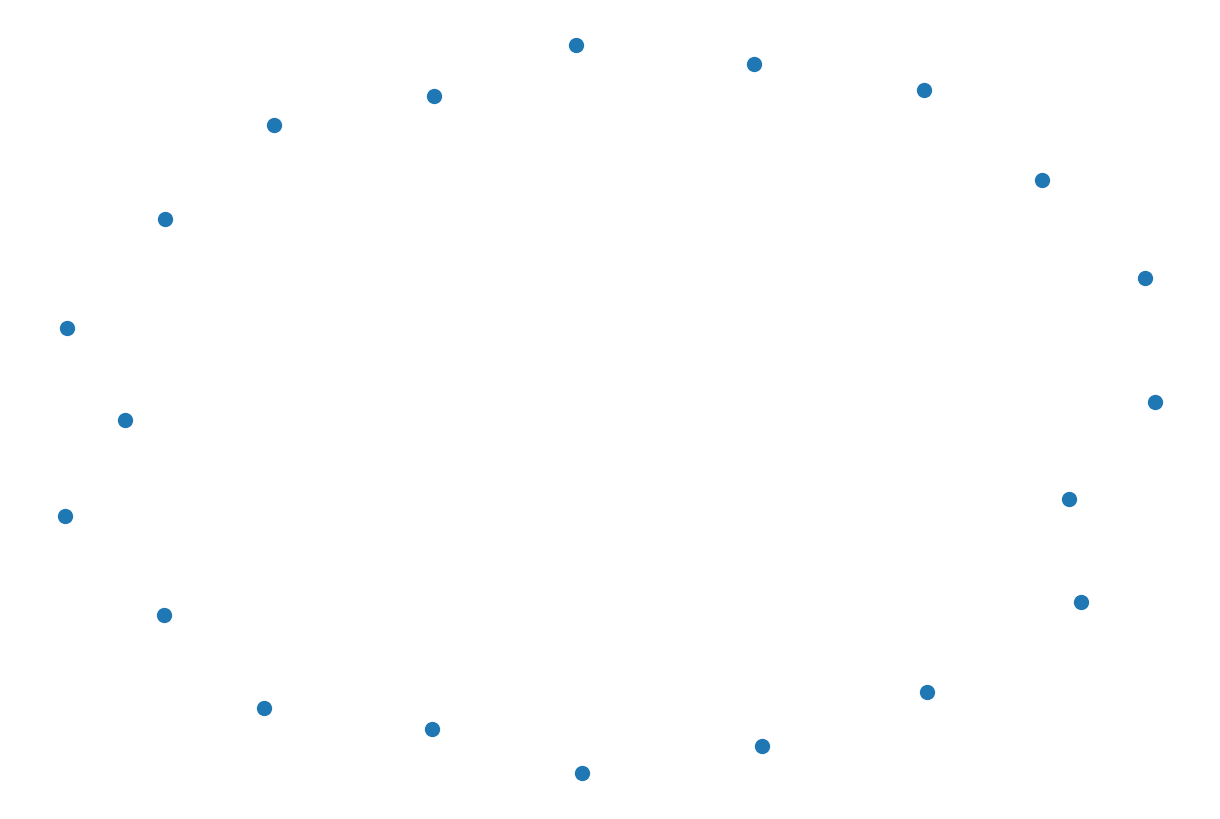

In [ ]:
plt.figure(figsize=(12, 8))
nx.draw(sample_mg, with_labels=False, node_size=100)
plt.show()


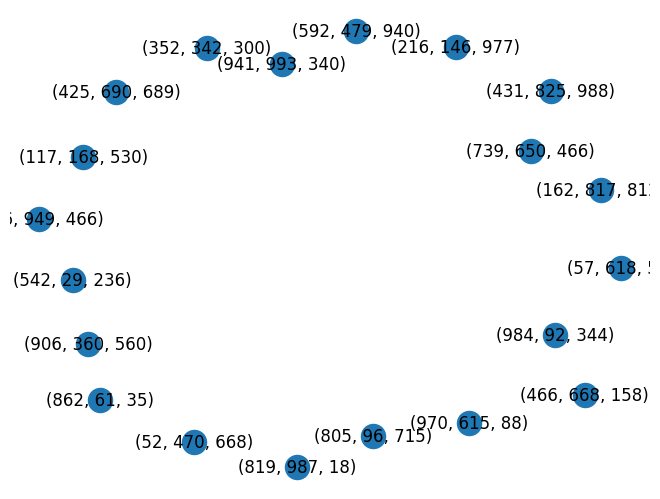

In [ ]:
nx.draw(sample_mg, with_labels=True)


Ok, is there a way to determine which two nodes are closest to each other? I have a function that calculates distance if that is helpful/needed

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Yes, your `calculate_distance` function will definitely be useful! You have a couple of options:

**Option 1:** Use your existing `a_dist_dict` — you've already calculated all the distances! You just need to find the pair with the minimum value.

**Option 2:** Use `itertools.combinations(junctions, 2)` to get all unique pairs (avoids duplicates like A→B and B→A), calculate distances, and find the minimum.

Since you already have `a_dist_dict` populated, that might be the easiest path. 

Think about it this way: you need to loop through all the entries in your dictionary and track which pair has the smallest distance. How might you approach finding the minimum across a nested dictionary structure?

Or, if you want a hint: Python's `min()` function can take a `key` argument that tells it *what* to minimize by...

Would you like to try writing something, or would you like another hint?

I would like another hint

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠

Sure! You can use `min()` with `itertools.combinations` like this:

```python
min(combinations(junctions, 2), key=lambda pair: calculate_distance(*pair[0], *pair[1]))
```

This finds the pair of junctions with the smallest distance. The `key` function tells `min()` to compare pairs based on their distance rather than the tuples themselves.

Give that a try and see what you get! Does the result look reasonable for your sample data?

In [ ]:
from itertools import combinations

In [ ]:
# [(pair_0, pair_1, calculate_distance(*pair_0,*pair_1)) for pair_0,pair_1 in combinations(junctions, 2)]

In [ ]:
min(combinations(junctions, 2), key=lambda pair: calculate_distance(*pair[0], *pair[1]))


((162, 817, 812), (425, 690, 689))

That's really cool. So how do I add an edge between two nodes in networkx?  It also seems like we should store these calculations so we only have to run the calculations once.  I think sorted has key as well doesn't it?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Great thinking on both points!

**Adding an edge** in networkx is straightforward:
```python
sample_mg.add_edge(node1, node2)
```

**Storing calculations:** Yes, good instinct! You could pre-compute all distances once and store them. You actually already have `a_dist_dict` from earlier — or you could create a sorted list of all pairs by distance.

**Sorted with key:** Exactly right! `sorted()` works just like `min()`:
```python
sorted(combinations(junctions, 2), key=lambda pair: calculate_distance(*pair[0], *pair[1]))
```

This gives you all pairs sorted from closest to farthest. Then for your 10 iterations, you could just grab the first 10 pairs from that sorted list!

Want to try creating the sorted list and then adding the first 10 as edges?

I like the idea, but I don't think we can just grab the first 10 pairs.  What if two other connections already make a connection? We should try connecting, but then check to see how many connected items we have in our graph maybe 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Ah, interesting thought! Can you help me understand what you're thinking — what changes after a connection is made?

Earlier you mentioned the same pair *can* be connected multiple times. So I want to make sure I understand the rule correctly:

- Does connecting two nodes change anything about future distance calculations?
- Or is there some other condition we need to check after each connection?

What does the problem say happens after each connection?

Let's say we have nodes A,B,C,D,E if A and B are connected, C and D are connected and then B and C are connected. A and D would then be part of the same circuit even though they were never connected by an edge directly.  These wouldn't be connected together since they already would be connected through another edge. 

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

That makes sense! So the rule is:

- Find the closest pair of nodes
- **Only connect them if they're not already in the same connected component** (i.e., there's no path between them yet)
- If they're already connected (directly or indirectly), skip that pair and move to the next closest

This is essentially building a **minimum spanning tree** — you're connecting nodes in order of distance, but skipping pairs that would create a cycle.

In networkx, you can check if two nodes are already connected through some path using:
```python
nx.has_path(graph, node1, node2)
```

But there's a catch — this only works if both nodes already have at least one edge. For disconnected nodes with no edges yet, you might need to handle that case.

Alternatively, `nx.connected_components(graph)` returns sets of nodes that are in the same component.

Does this match what the problem is asking for? If so, how would you approach iterating through your sorted pairs and only adding edges when the nodes aren't already connected?

Let's start building and see if we run into an issue.  

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Sounds good! Here's what you need to do for each iteration:

1. Go through pairs in order of distance (smallest first)
2. Check if the pair is already connected
3. If not connected, add the edge and move to the next iteration
4. If already connected, skip to the next pair

Try writing a loop that:
- Uses your sorted pairs
- Checks `nx.has_path()` before adding an edge
- Stops after 10 connections

Give it a shot and let's see what happens!

In [ ]:
junctions = list(map(lambda x: tuple(map(int,      x.split(','))), sample_input))

sample_mg = nx.MultiGraph()
sample_mg.add_nodes_from(junctions)
n=1
for node_0, node_1 in sorted(combinations(junctions, 2), key=lambda pair: calculate_distance(*pair[0], *pair[1])):
    print(f"Connecting {node_0} and {node_1}")
    if not nx.has_path(sample_mg, node_0, node_1):
        sample_mg.add_edge(node_0, node_1)
        n+=1
    else: 
        print(f"{node_0} and {node_1} are already connected, skipping!")
    if n==10: 
        break

Connecting (162, 817, 812) and (425, 690, 689)
Connecting (162, 817, 812) and (431, 825, 988)
Connecting (906, 360, 560) and (805, 96, 715)
Connecting (431, 825, 988) and (425, 690, 689)
(431, 825, 988) and (425, 690, 689) are already connected, skipping!
Connecting (862, 61, 35) and (984, 92, 344)
Connecting (52, 470, 668) and (117, 168, 530)
Connecting (819, 987, 18) and (941, 993, 340)
Connecting (906, 360, 560) and (739, 650, 466)
Connecting (346, 949, 466) and (425, 690, 689)
Connecting (906, 360, 560) and (984, 92, 344)


Ok, I think I have it ready to test. How do I get the largest groups of nodes and how many nodes they contain?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠

Nice work! You can use `nx.connected_components()` which returns an iterator of sets, where each set contains the nodes in a connected component.

To get them sorted by size (largest first):

```python
sorted(nx.connected_components(sample_mg), key=len, reverse=True)
```

Or if you just want to see the sizes:

```python
[len(c) for c in nx.connected_components(sample_mg)]
```

Try it out and see what your components look like! Does the result match what the sample expects?

In [ ]:
import math
math.prod([len(c) for c in sorted(nx.connected_components(sample_mg), key=len, reverse=True)][:3])


40

In [ ]:
len(junctions)

1000

In [ ]:
junctions = list(map(lambda x: tuple(map(int,      x.split(','))), instructions))

mg = nx.MultiGraph()
mg.add_nodes_from(junctions)
n=1
for node_0, node_1 in sorted(combinations(junctions, 2), key=lambda pair: calculate_distance(*pair[0], *pair[1])):
    # print(f"Connecting {node_0} and {node_1}")
    if not nx.has_path(mg, node_0, node_1):
        mg.add_edge(node_0, node_1)
        n+=1
    else: 
        pass
        # print(f"{node_0} and {node_1} are already connected, skipping!")
    if n==1000:
        break

In [ ]:
math.prod([len(c) for c in sorted(nx.connected_components(mg), key=len, reverse=True)][:3])


1000

In [ ]:
[len(c) for c in sorted(nx.connected_components(mg), key=len, reverse=True)]

[1000]

<h2>--- Day 8: Playground ---</h2><p>Equipped with a new understanding of teleporter maintenance, you confidently step onto the repaired teleporter pad.</p>
<p>You rematerialize on an unfamiliar teleporter pad and find yourself in a vast underground space which contains a giant playground!</p>
<p>Across the playground, a group of Elves are working on setting up an ambitious Christmas decoration project. Through careful rigging, they have suspended a large number of small electrical <a href="https://en.wikipedia.org/wiki/Junction_box" target="_blank">junction boxes</a>.</p>
<p>Their plan is to connect the junction boxes with long strings of lights. Most of the junction boxes don't provide electricity; however, when two junction boxes are connected by a string of lights, electricity can pass between those two junction boxes.</p>
<p>The Elves are trying to figure out <em>which junction boxes to connect</em> so that electricity can reach <em>every</em> junction box. They even have a list of all of the junction boxes' positions in 3D space (your puzzle input).</p>
<p>For example:</p>
<pre><code>162,817,812
57,618,57
906,360,560
592,479,940
352,342,300
466,668,158
542,29,236
431,825,988
739,650,466
52,470,668
216,146,977
819,987,18
117,168,530
805,96,715
346,949,466
970,615,88
941,993,340
862,61,35
984,92,344
425,690,689
</code></pre>
<p>This list describes the position of 20 junction boxes, one per line. Each position is given as <code>X,Y,Z</code> coordinates. So, the first junction box in the list is at <code>X=162</code>, <code>Y=817</code>, <code>Z=812</code>.</p>
<p>To save on string lights, the Elves would like to focus on connecting pairs of junction boxes that are <em>as close together as possible</em> according to <a href="https://en.wikipedia.org/wiki/Euclidean_distance" target="_blank">straight-line distance</a>. In this example, the two junction boxes which are closest together are <code>162,817,812</code> and <code>425,690,689</code>.</p>
<p>By connecting these two junction boxes together, because electricity can flow between them, they become part of the same <em>circuit</em>. After connecting them, there is a single circuit which contains two junction boxes, and the remaining 18 junction boxes remain in their own individual circuits.</p>
<p>Now, the two junction boxes which are closest together but aren't already directly connected are <code>162,817,812</code> and <code>431,825,988</code>. After connecting them, since <code>162,817,812</code> is already connected to another junction box, there is now a single circuit which contains <em>three</em> junction boxes and an additional 17 circuits which contain one junction box each.</p>
<p>The next two junction boxes to connect are <code>906,360,560</code> and <code>805,96,715</code>. After connecting them, there is a circuit containing 3 junction boxes, a circuit containing 2 junction boxes, and 15 circuits which contain one junction box each.</p>
<p>The next two junction boxes are <code>431,825,988</code> and <code>425,690,689</code>. Because these two junction boxes were <em>already in the same circuit</em>, nothing happens!</p>
<p>This process continues for a while, and the Elves are concerned that they don't have enough extension cables for all these circuits. They would like to know how big the circuits will be.</p>
<p>After making the ten shortest connections, there are 11 circuits: one circuit which contains <em>5</em> junction boxes, one circuit which contains <em>4</em> junction boxes, two circuits which contain <em>2</em> junction boxes each, and seven circuits which each contain a single junction box. Multiplying together the sizes of the three largest circuits (5, 4, and one of the circuits of size 2) produces <code><em>40</em></code>.</p>
<p>Your list contains many junction boxes; connect together the <em>1000</em> pairs of junction boxes which are closest together. Afterward, <em>what do you get if you multiply together the sizes of the three largest circuits?</em></p>

I think I did something wrong. For the full dataset, I am supposed to make 1000 connections, but there are only 1000 junctions total so this will connect everything together into a single item.  Can you help me figure out what I'm doing wrong?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Good catch! Look carefully at the problem statement and your code:

The problem says to "connect together the **1000 pairs** of junction boxes which are **closest together**."

In your code, you're incrementing `n` only when you **successfully add an edge**. But the problem wants you to **attempt** the 1000 closest pairs — including the ones that get skipped because they're already in the same circuit!

Look at the sample: it says "after making the ten shortest connections" — meaning you go through the 10 closest pairs, even if some of them result in "nothing happens!"

So your counter should increment on every iteration through pairs, not just successful edge additions. Does that make sense?

How did I end up getting the correct answer on the sample data?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

Great question! It's a bit of a lucky coincidence.

In the sample:
- You attempted pairs until you had 9 successful edge additions (your `n` went from 1 to 10)
- By that point, you happened to have gone through approximately 10 pairs (one was skipped)
- The numbers happened to align close enough to get 40

With 20 nodes and only 10 pairs to process, the difference between "9 successful adds" and "10 attempted pairs" was small — just one skipped connection.

But with 1000 junctions and 1000 pairs to attempt, many more pairs will be skipped (as components grow larger, more pairs will already be connected). So "1000 successful adds" vs "1000 attempted pairs" becomes a much bigger difference — enough to connect everything vs leaving multiple components.

Try moving your `n += 1` outside of the `if` block so it counts every pair attempted, not just successful connections!

In [ ]:
junctions = list(map(lambda x: tuple(map(int,      x.split(','))), sample_input))

sample_mg = nx.MultiGraph()
sample_mg.add_nodes_from(junctions)
n=0
for node_0, node_1 in sorted(combinations(junctions, 2), key=lambda pair: calculate_distance(*pair[0], *pair[1])):
    print(f"Connecting {node_0} and {node_1}")
    if not nx.has_path(sample_mg, node_0, node_1):
        sample_mg.add_edge(node_0, node_1)
    else: 
        print(f"{node_0} and {node_1} are already connected, skipping!")
    n+=1
    if n==10: 
        break

Connecting (162, 817, 812) and (425, 690, 689)
Connecting (162, 817, 812) and (431, 825, 988)
Connecting (906, 360, 560) and (805, 96, 715)
Connecting (431, 825, 988) and (425, 690, 689)
(431, 825, 988) and (425, 690, 689) are already connected, skipping!
Connecting (862, 61, 35) and (984, 92, 344)
Connecting (52, 470, 668) and (117, 168, 530)
Connecting (819, 987, 18) and (941, 993, 340)
Connecting (906, 360, 560) and (739, 650, 466)
Connecting (346, 949, 466) and (425, 690, 689)
Connecting (906, 360, 560) and (984, 92, 344)


In [ ]:
math.prod([len(c) for c in sorted(nx.connected_components(sample_mg), key=len, reverse=True)][:3])


40

In [ ]:
junctions = list(map(lambda x: tuple(map(int,      x.split(','))), instructions))

mg = nx.MultiGraph()
mg.add_nodes_from(junctions)
n=0
for node_0, node_1 in sorted(combinations(junctions, 2), key=lambda pair: calculate_distance(*pair[0], *pair[1])):
    # print(f"Connecting {node_0} and {node_1}")
    if not nx.has_path(mg, node_0, node_1):
        mg.add_edge(node_0, node_1)
    else: 
        pass
        # print(f"{node_0} and {node_1} are already connected, skipping!")
    n+=1
    if n==1000:
        break

In [ ]:
math.prod([len(c) for c in sorted(nx.connected_components(mg), key=len, reverse=True)][:3])


102816

In [ ]:
from aocd import get_puzzle, submit


In [ ]:
p = get_puzzle(year=2025, day=8)

In [ ]:
p.prose0_path

Path('/app/data/.config/aocd/prose/2025_08_prose.0.html')

In [ ]:
pair_0

(216, 146, 977)

### Part 2

--- Part Two ---
The Elves were right; they definitely don't have enough extension cables. You'll need to keep connecting junction boxes together until they're all in one large circuit.

Continuing the above example, the first connection which causes all of the junction boxes to form a single circuit is between the junction boxes at 216,146,977 and 117,168,530. The Elves need to know how far those junction boxes are from the wall so they can pick the right extension cable; multiplying the X coordinates of those two junction boxes (216 and 117) produces 25272.

Continue connecting the closest unconnected pairs of junction boxes together until they're all in the same circuit. What do you get if you multiply together the X coordinates of the last two junction boxes you need to connect?

I think with these updated instructions, I need to 

In [ ]:
junctions = list(map(lambda x: tuple(map(int,      x.split(','))), sample_input))

sample_mg = nx.MultiGraph()
sample_mg.add_nodes_from(junctions)
n=0
for node_0, node_1 in sorted(combinations(junctions, 2), key=lambda pair: calculate_distance(*pair[0], *pair[1])):
    if not nx.has_path(sample_mg, node_0, node_1):
        # print(f"Connecting {node_0} and {node_1}")
        sample_mg.add_edge(node_0, node_1)
        last_node_0=node_0
        last_node_1=node_1
    else: 
        pass
        # print(f"{node_0} and {node_1} are already connected, skipping!")
    n+=1

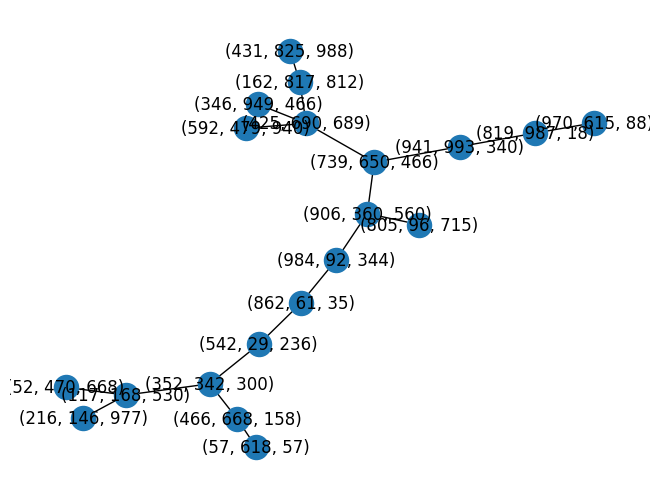

In [ ]:
nx.draw(sample_mg, with_labels=True)


In [ ]:
last_node_0[0]*last_node_1[0]

25272

In [ ]:
junctions = list(map(lambda x: tuple(map(int,      x.split(','))), instructions))

mg = nx.MultiGraph()
mg.add_nodes_from(junctions)
n=0
for node_0, node_1 in sorted(combinations(junctions, 2), key=lambda pair: calculate_distance(*pair[0], *pair[1])):
    if not nx.has_path(mg, node_0, node_1):
        # print(f"Connecting {node_0} and {node_1}")
        mg.add_edge(node_0, node_1)
        last_node_0=node_0
        last_node_1=node_1
        n+=1
    else: 
        pass
        # print(f"{node_0} and {node_1} are already connected, skipping!")
    if n >=999: 
        break

In [ ]:
last_node_0[0]*last_node_1[0]

100011612

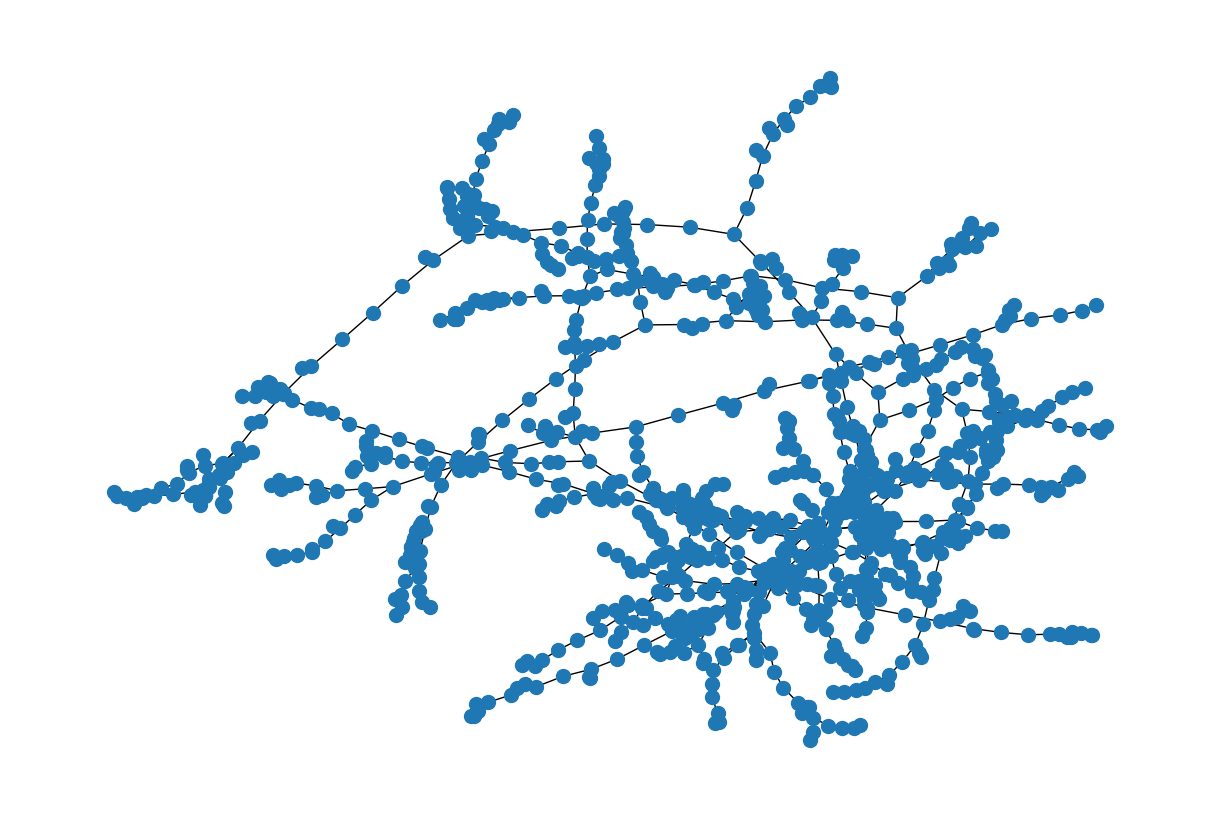

In [ ]:
plt.figure(figsize=(12, 8))
nx.draw(mg, with_labels=False, node_size=100)
plt.show()